### Classification - Exercise  8

#### Importing the necessary libaries and dataset

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [69]:
CLabData = pd.read_csv('ClassificationLabData.csv')

In [70]:
CLabData.head()

,age,worktype,fnlwgt,EducationLevel,educationnum,marital_status,CurrentOccupation,RelationshipStatus,race,Gender,capitalgain,capitalloss,hoursperweek,Label
0,54,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
1,42,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
2,57,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
3,32,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K
4,41,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,<=50K


#### Getting the Feature Variables

In [71]:
X = CLabData.drop('Label', axis= 'columns')

#### Getting the Target Variable

In [72]:
y = CLabData['Label']

#### Performing Encoding 

In [73]:
le = LabelEncoder()

for col in ['worktype', 'EducationLevel', 'marital_status', 'CurrentOccupation', 'RelationshipStatus', 'race', 'Gender']:
    X[col] = le.fit_transform(X[col])

In [74]:
X

,age,worktype,fnlwgt,EducationLevel,educationnum,marital_status,CurrentOccupation,RelationshipStatus,race,Gender,capitalgain,capitalloss,hoursperweek
0,54,6,83311,9,13,2,4,0,4,1,0,0,13
1,42,4,215646,11,9,0,6,1,4,1,0,0,40
2,57,4,234721,1,7,2,6,0,2,1,0,0,40
3,32,4,338409,9,13,2,10,5,2,0,0,0,40
4,41,4,284582,12,14,2,4,5,4,0,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,31,4,257302,7,12,2,13,5,4,0,0,0,38
32556,44,4,154374,11,9,2,7,0,4,1,0,0,40
32557,62,4,151910,11,9,6,1,4,4,0,0,0,40
32558,26,4,201490,11,9,4,1,3,4,1,0,0,20


#### Splitting the Dataset into Traning and Testing

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify=y)

#### Building the Decision Tree

In [76]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

#### Predicting on test data

In [77]:
y_pred_DT = DT_model.predict(X_test)

#### Evaluating the Decision Tree model

In [78]:
DT_accuracy = accuracy_score(y_test, y_pred_DT)

In [79]:
DT_conf_matrix = confusion_matrix(y_test, y_pred_DT)

In [80]:
print("Decision Tree Accuracy:", DT_accuracy)

Decision Tree Accuracy: 0.8026719901719902


In [81]:
print("Decision Tree Confusion Matrix:\n", DT_conf_matrix)

Decision Tree Confusion Matrix:
 [[4295  649]
 [ 636  932]]


In [82]:
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_DT))

Decision Tree Classification Report:
               precision    recall  f1-score   support

       <=50K       0.87      0.87      0.87      4944
        >50K       0.59      0.59      0.59      1568

    accuracy                           0.80      6512
   macro avg       0.73      0.73      0.73      6512
weighted avg       0.80      0.80      0.80      6512



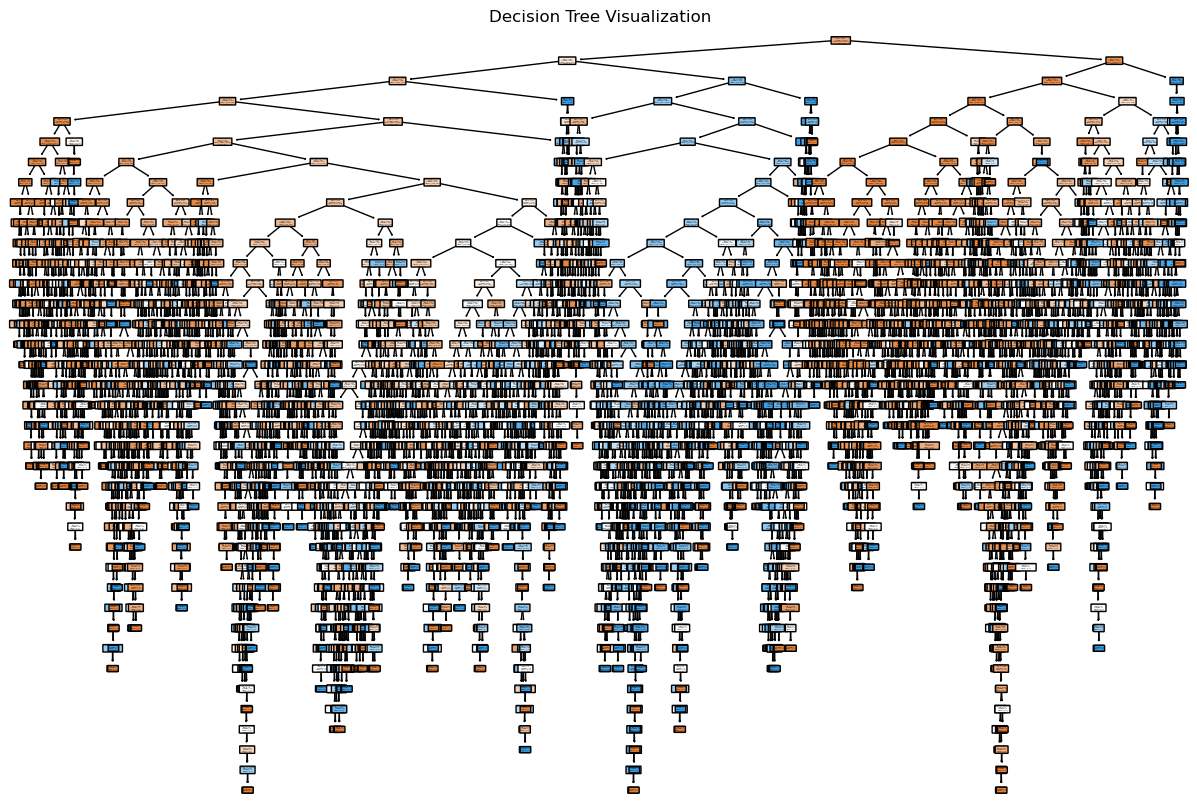

In [83]:
plt.figure(figsize=(15, 10))
plot_tree(DT_model, filled=True, rounded=True, feature_names=X.columns, class_names=True)
plt.title("Decision Tree Visualization")
plt.show()

#### Building the Naive Bayes Model

In [84]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

#### Doing the prediction on the test data

In [85]:
y_pred_NB = NB_model.predict(X_test)

#### Evaluate Naïve Bayes model

In [86]:
NB_accuracy = accuracy_score(y_test, y_pred_NB)

In [87]:
NB_conf_matrix = confusion_matrix(y_test, y_pred_NB)

In [88]:
print("Naïve Bayes Accuracy:", NB_accuracy)

Naïve Bayes Accuracy: 0.796529484029484


In [89]:
print("Naïve Bayes Confusion Matrix:\n", NB_conf_matrix)

Naïve Bayes Confusion Matrix:
 [[4708  236]
 [1089  479]]


In [90]:
print("Naïve Bayes Classification Report:\n", classification_report(y_test, y_pred_NB))

Naïve Bayes Classification Report:
               precision    recall  f1-score   support

       <=50K       0.81      0.95      0.88      4944
        >50K       0.67      0.31      0.42      1568

    accuracy                           0.80      6512
   macro avg       0.74      0.63      0.65      6512
weighted avg       0.78      0.80      0.77      6512

